In [2]:
# ln (x) question
def ln(x):
    x = 1-x
    pre = 0
    result = -x
    i = 2
    while pre - result > 0.00001:
        pre = result
        result -= pow(x,i) / i
        i = i+1
    return result
ln(0.8)

-0.22314316190476188

In [3]:
# 4 iterations
def lniter4(x):
    x = 1-x
    result = -x
    for i in range(2,4) :
        result -= pow(x,i) / i
    return result
lniter4(0.8)

-0.22266666666666662

In [3]:
# square root appox
def squareroot(x) :
    n = 1
    result = (n + x/n) / 2
    while abs(n - result) > 0.0000001:
        n = result
        result = (n + x/n) / 2
    return result
squareroot(2)

1.414213562373095

In [4]:
# square root 4 iter
def squarerootiter4(x) :
    n = 1
    result = (n + x/n) / 2
    for i in range(2,4):
        n = result
        result = (n + x/n) / 2
    return result
squareroot(3)

1.7320508075688772

In [35]:
import numpy as np
linsys = np.array([[1,2,-1],[2,-3,1],[5,-1,-2]], dtype='float')
b = np.array([[2],[-1],[-3]])

In [36]:
def inversesolve(x, b) :
    y = np.linalg.inv(x)
    return np.dot(y,b)
inversesolve(linsys, b)

array([[ 1.],
       [ 2.],
       [ 3.]])

In [37]:
def gausselimate(x, b) :
    result = np.hstack((x,b))
    n = len(result)
    for i in range(n):
        a = result[i]
    for j in range(i + 1, n):
        b = result[j]
        m = a[i] / b[i]
        result[j] = a - m * b

    for i in range(n - 1, -1, -1):
        result[i] = result[i] / result[i, i]
        a = result[i]
        for j in range(i - 1, -1, -1):
            b = result[j]
            m = a[i] / b[i]
            result[j] = a - m * b
    return result[:, 3]
gausselimate(linsys, b)

array([ 1.        ,  0.71428571,  1.5       ])

In [29]:
ab = np.hstack((linsys, b))
print(ab)

[[ 1  2 -1  2]
 [ 2 -3  1 -1]
 [ 5 -1 -2 -3]]


In [27]:
print((linsys[1], b[1]))

(array([ 2, -3,  1]), array([-1]))


In [31]:
len(ab[0])

4

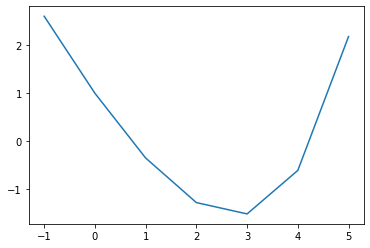

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1,6)
y= np.exp(0.5*x)-(2*x)
plt.plot(x,y)
plt.show()

In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np
def goldensectionsearch(xl,xu):
    i=0
    while (i<4):
        i = i+1
        d= (1.6180339-1)*(xu-xl)
        x1= xl+ d
        x2= xu- d
        y1= np.exp(0.5*x1)-(2*x1)
        y2= np.exp(0.5*x2)-(2*x2)
        xmin=0
        if y1 > y2:
            xu=x1
            xmin=x2
            print(xmin)
        else :
            xl=x2
            xmin=x1
            print("ok",xmin)
    return xmin

In [56]:
goldensectionsearch(5,-1)

2.7082033999999995
ok 2.7082045907047405
2.708203854808846
ok 2.7082043096174555


2.7082043096174555

In [63]:
import numpy as np
def paraopt(f,x1,x2,x3):
    eps = 0.005
    epa = 100
    xopt = -999999
    def f(x):
        result = np.exp(0.5*x)-(2*x) 
        return result
    while (epa>eps):
        xopt_prev = xopt
        alpha1 = (x2-x1)*(x2-x1)*(f(x2)-f(x3))
        alpha2 = (x2-x3)*(x2-x3)*(f(x2)-f(x1))
        beta1 = (x2-x1)*(f(x2)-f(x3))
        beta2 = (x2-x3)*(f(x2)-f(x1))
        gamma = (alpha1 - alpha2)/(beta1-beta2)
        x4 = x2 - (0.5*gamma)
        
        if (x4>x2):
            x1=x2
            x2-x4
        else: 
            x3=x2
            x2=x4
            
        xopt = x4
        epa = abs((xopt-xopt_prev)/xopt)*100
        print('epa= ',epa,' x4= ',x4)
    return xopt,f(xopt)

In [65]:
paraopt(1,2,3,4)

epa=  36943794.98340705  x4=  2.7068191215013577
epa=  1.9458093543916464  x4=  2.760533847333929
epa=  nan  x4=  nan


/Users/baiplunk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(nan, nan)